In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
print(f'Libraries have been imported! :)')

Libraries have been imported! :)


In [2]:
train = pd.read_csv('D:/Dev65/install/python/data/breastcancer.csv')
print(f'Preview:\n\n{train.head()}')

Preview:

           id                     name  radius  texture  perimeter    area  \
0    ID842302           Glynnis Munson     NaN    10.38     122.80  1001.0   
1    ID842517              Lana Behrer   20.57    17.77     132.90  1326.0   
2  ID84300903  Devondra Vanvalkenburgh   19.69    21.25     130.00  1203.0   
3  ID84348301          Glory Maravalle     NaN    20.38      77.58   386.1   
4  ID84358402           Mellie Mccurdy   20.29    14.34     135.10  1297.0   

   smoothness  compactness  concavity  symmetry  fractal_dimension  age  \
0     0.11840      0.27760     0.3001    0.2419            0.07871   35   
1     0.08474      0.07864     0.0869    0.1812            0.05667   27   
2     0.10960      0.15990     0.1974    0.2069            0.05999   31   
3     0.14250      0.28390     0.2414    0.2597            0.09744   49   
4     0.10030      0.13280     0.1980    0.1809            0.05883   20   

   diagnosis  
0          1  
1          1  
2          1  
3         

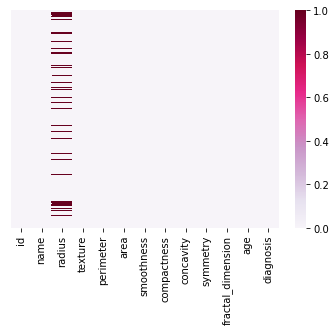

In [3]:
# simple heat map showing where we are missing data
heat_map = sns.heatmap(train.isnull(), yticklabels = False, cbar = True, cmap = "PuRd", vmin = 0, vmax = 1)
plt.show()

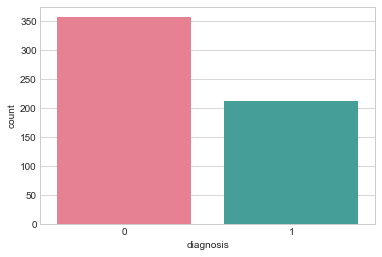

In [4]:
# a count plot shows the counts of observations in each categorical bin using bars
# think of it as a histogram across a categorical, instead of quantitative, variable
sns.set_style("whitegrid")
sns.countplot(data = train, x = 'diagnosis', palette = 'husl')

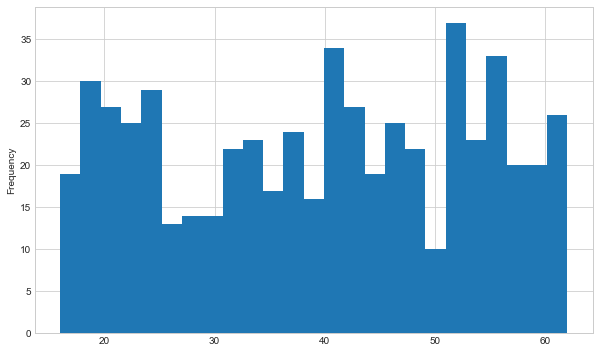

In [5]:
# let's check out the spread of ages using a histogram
train['age'].plot.hist(bins = 25, figsize = (10,6))

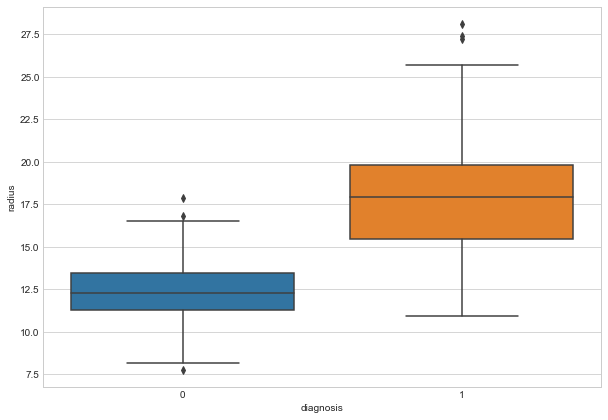

In [6]:
plt.figure(figsize = (10,7))
sns.boxplot(x = "diagnosis", y = "radius", data = train)

In [7]:
# calculate the average radius size by diagnosis (0 or 1)
train.groupby('diagnosis')["radius"].mean()

diagnosis
0    12.340825
1    17.896629
Name: radius, dtype: float64

In [8]:
# create a function that imputes average radius into missing values
def impute_radius(cols):
    radius = cols[0]
    diagnosis = cols[1]
    
    # if value in radius column is null
    if pd.isnull(radius):
        
        # if woman is diagnosed with breast cancer
        if diagnosis == 1:
            return 17
        # if woman was not diagnosed with breast cancer
        else:
            return 12
    # when value in radius column is not null
    else:
        # return that same value
        return radius

In [9]:
train['radius'] = train[['radius', 'diagnosis']].apply(impute_radius, axis = 1)

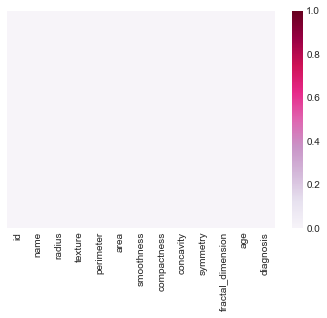

In [10]:
# check the heat map again after applying the above function
heat_map = sns.heatmap(train.isnull(), yticklabels = False, cbar = True, cmap = "PuRd", vmin = 0, vmax = 1)
plt.show()

In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 13 columns):
id                   569 non-null object
name                 569 non-null object
radius               569 non-null float64
texture              569 non-null float64
perimeter            569 non-null float64
area                 569 non-null float64
smoothness           569 non-null float64
compactness          569 non-null float64
concavity            569 non-null float64
symmetry             569 non-null float64
fractal_dimension    569 non-null float64
age                  569 non-null int64
diagnosis            569 non-null int64
dtypes: float64(9), int64(2), object(2)
memory usage: 57.9+ KB


In [13]:
# dropping categorical variables
train.drop(['id', 'name'], axis = 1, inplace = True)

In [14]:
train.head()

,radius,texture,perimeter,area,smoothness,compactness,concavity,symmetry,fractal_dimension,age,diagnosis
0,17.00,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.2419,0.07871,35,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.1812,0.05667,27,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.2069,0.05999,31,1
3,17.00,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.2597,0.09744,49,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.1809,0.05883,20,1


In [15]:
X = train.drop('diagnosis', axis = 1)
y = train['diagnosis']

In [16]:
X.head()

,radius,texture,perimeter,area,smoothness,compactness,concavity,symmetry,fractal_dimension,age
0,17.00,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.2419,0.07871,35
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.1812,0.05667,27
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.2069,0.05999,31
3,17.00,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.2597,0.09744,49
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.1809,0.05883,20


In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 101)

In [22]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
predictions = logreg.predict(X_test)
print(predictions)

[0 0 0 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 1 0 0 1
 0 1 1 1 0 0 0 0 0 1 0 0 0 1 1 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 1 1 0 1 0 0 0
 1 1 0 1 1 1 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0
 0 1 1 0 0 0 1 1 1 1 1 1 0 0 0 0 0 1 0 1 1 1 0 0 0 1 1 1 0 1 0 1 0 0 0 1 0
 1 0 0 1 0 1 0 1 0 1 0 0 0 0 0 1 1 1 0 0 0 1 0]


In [30]:
from sklearn.externals import joblib
import pickle

saved_model = pickle.dumps(logreg)
joblib.dump(logreg, 'filename.pkl')

['filename.pkl']

In [19]:
from sklearn.metrics import classification_report

classification_report(y_test, predictions)

'             precision    recall  f1-score   support\n\n          0       0.91      0.93      0.92       105\n          1       0.89      0.85      0.87        66\n\navg / total       0.90      0.90      0.90       171\n'

In [20]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions)

array([[98,  7],
       [10, 56]], dtype=int64)

In [27]:
import IPython.display

#display(X_train)
#print(type(X_train))

#pandas dataFrame > 표 형식 내용 날릴수 있음 > 가져온 데이터 하나하나 넣어주고
#표 형식 내용 날림
drops = X_train[X_train['age'] < 100].index
print(drops)
x_train2 = X_train.drop(drops)
print(x_train2)
#display(x_train2)

# 가져온 데이터 넣어줌
new_data = {'radius': 17.00, 'texture' : 1.38, 'perimeter':122.80, 'area': 1001.0, 'smoothness': 0.4, 'compactness': 0.27760,
            'concavity': 0.03001, 'symmetry': 0.2419, 'fractal_dimension': 0.07871, 'age': 35}
x_train3 = x_train2.append(new_data, ignore_index=True)
#display(x_train3)

# 데이터 예측 '0이면 악성, 1이면 양성'
prediction2 = logreg.predict(x_train3)
print(prediction2)

# 지도학습 모델 중 k-nn모델
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 1)

knn.fit(X_train, y_train)    # 분류기 모델에 학습 데이터와 label 데이터 적용

predict_label = knn.predict(X_test)    # 분류기 모델의 결과 예측

print('test accuracy {:.2f}'.format(np.mean(y_test == predict_label)))   # 정확도 출력 1

from sklearn.metrics import accuracy_score

print('test accuracy {:.2f}'.format(accuracy_score(y_test, predict_label)))    # 정확도 출력 2

row_data = {'radius': [],
            'texture': [],
            'perimeter': [],
            'area': [],
            'smoothness': [],
            'compactness': [],
            'concavity': [],
            'symmetry': [],
            'fractal_dimension': [],
            'age': []}

Int64Index([178, 421,  57, 514, 548, 456, 511,  69, 410, 382,
            ...
             40, 477,   5, 110, 316, 552, 393,  75, 337, 523],
           dtype='int64', length=398)
Empty DataFrame
Columns: [radius, texture, perimeter, area, smoothness, compactness, concavity, symmetry, fractal_dimension, age]
Index: []
[1]
test accuracy 0.82
test accuracy 0.82


In [28]:


predict_label = knn.predict(X_test)    # 분류기 모델의 결과 예측

print('test accuracy {:.2f}'.format(np.mean(y_test == predict_label)))   # 정확도 출력 1

from sklearn.metrics import accuracy_score

print('test accuracy {:.2f}'.format(accuracy_score(y_test, predict_label)))    # 정확도 출력 2

test accuracy 0.82
test accuracy 0.82


In [31]:
# 지도학습 모델 중 k-nn모델
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 1)

knn.fit(X_train, y_train)    # 분류기 모델에 학습 데이터와 label 데이터 적용

joblib.dump(knn, 'knn.pkl')

['knn.pkl']